In [2]:
#Cite https://github.com/JonathanTay/CS-7641-assignment-3/blob/master/ICA.py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import FastICA
import sys
sys.path.append('../')
from Util import loadBeerRaw,loadWine,runNNs

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\fastica_.py:301: UserWarning: n_components is too large: it will be set to 10
  warnings.warn('n_components is too large: it will be set to %s' % n_components)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\fastica_.py:301: UserWarning: n_components is too large: it will be set to 10
  warnings.warn('n_components is too large: it will be set to %s' % n_components)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\fastica_.py:301: UserWarning: n_components is too large: it will be set to 10
  warnings.warn('n_components is too large: it will be set to %s' % n_components)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\fastica_.py:301: UserWarning: n_components is too large: it will be set to 10
  warnings.warn('n_components is too large: it will be set to %s' % n_components)


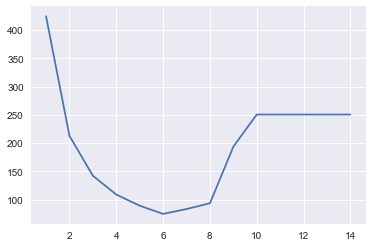

In [41]:
X_train, X_test, y_train, y_test= loadBeerRaw()
X_train['SugarScale'] = encoder.fit_transform(X_train['SugarScale']).astype(np.int32)
X_train=X_train[['OG','FG','ABV','IBU','Color','BoilSize','BoilTime','Efficiency','SugarScale','StyleID']]
kurt = {}
for dim in range(1,15):
    ica.set_params(n_components=dim)
    tmp = ica.fit_transform(X_train)
    tmp = pd.DataFrame(tmp)
    tmp = tmp.kurt(axis=0)
    kurt[dim] = tmp.abs().mean()
kurt = pd.Series(kurt) 
plt.plot(kurt,label="kurtosis")


In [45]:
ica = FastICA(n_components=2,
         random_state=0)
encoder = LabelEncoder()

icaComponents =ica.fit_transform(X_train)
icaDf = pd.DataFrame(data = icaComponents
             , columns = ['ICA component 1','ICA component 2'])

In [46]:
icaDf.head()

,ICA component 1,ICA component 2
0,0.000519,-0.001417
1,0.000489,0.003515
2,0.000451,0.003915
3,0.000889,0.004258
4,0.000487,0.003139


In [29]:
finalDf = pd.concat([icaDf, y_train], axis = 1)
finalDf.head()

,ICA component 1,Style
0,-0.000522,NaN
1,-0.000482,Cream Ale
2,-0.000444,Holiday/Winter Special Spiced Beer
3,-0.000882,American IPA
4,-0.000482,NaN


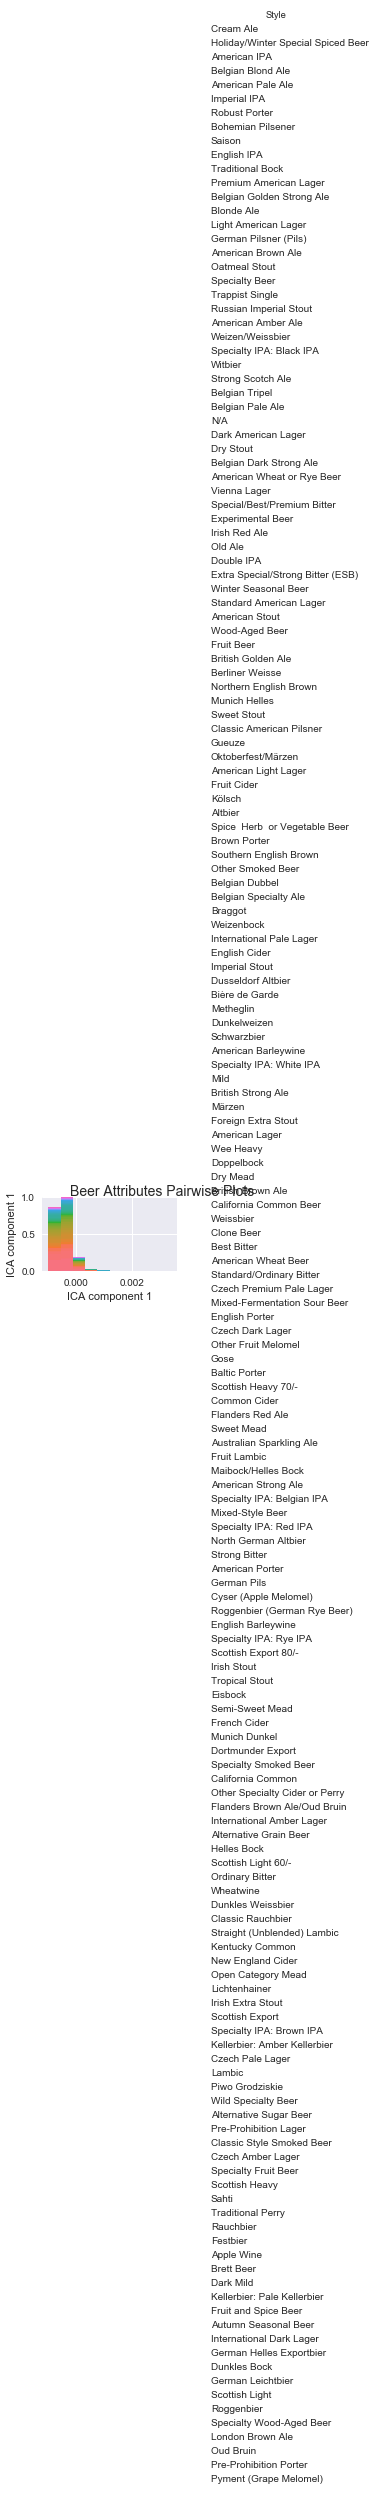

In [47]:
pp = sns.pairplot(finalDf, hue='Style', size=1.8, aspect=1.8)
fig = pp.fig 
t = fig.suptitle('Beer Attributes Pairwise Plots', fontsize=14)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\fastica_.py:118: UserWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\fastica_.py:301: UserWarning: n_components is too large: it will be set to 11
  warnings.warn('n_components is too large: it will be set to %s' % n_components)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\fastica_.py:301: UserWarning: n_components is too large: it will be set to 11
  warnings.warn('n_components is too large: it will be set to %s' % n_components)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\fastica_.py:301: UserWarning: n_components is too large: it will be set to 11
  warnings.warn('n_components is too large: it will be set to %s' % n_components)


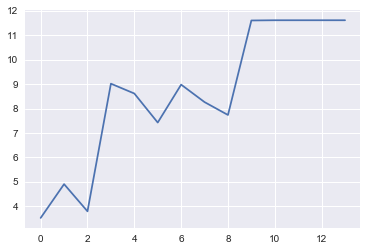

In [64]:
X_train, X_test, y_train, y_test= loadWine()
kurt = []
for dim in range(1,15):
    ica.set_params(n_components=dim)
    tmp = ica.fit_transform(X_train)
    tmp = pd.DataFrame(tmp)
    tmp = tmp.kurt(axis=0)
    kurt.append(tmp.abs().mean())

encoder = LabelEncoder()
ica = FastICA(n_components=9,
         random_state=0)
cols = []
for x in range(0,9):
    cols.append('ICA component '+str(x))
    
icaComponents =ica.fit_transform(X_train)
X_train = pd.DataFrame(data = icaComponents,index=X_train.index
             , columns = cols)
icaComponents = ica.transform(X_test)
X_test = pd.DataFrame(data = icaComponents,index=X_test.index
             , columns = cols)

num_features = X_train.shape[1]
num_classes = 10
plt.plot(kurt)


C:\ProgramData\Anaconda3\lib\site-packages\nolearn\lasagne\base.py:370: UserWarning: The 'eval_size' argument has been deprecated, please use the 'train_split' parameter instead, e.g.
train_split=TrainSplit(eval_size=0.4)
  warn("The 'eval_size' argument has been deprecated, please use "
C:\ProgramData\Anaconda3\lib\site-packages\nolearn\lasagne\base.py:370: UserWarning: The 'eval_size' argument has been deprecated, please use the 'train_split' parameter instead, e.g.
train_split=TrainSplit(eval_size=0.4)
  warn("The 'eval_size' argument has been deprecated, please use "


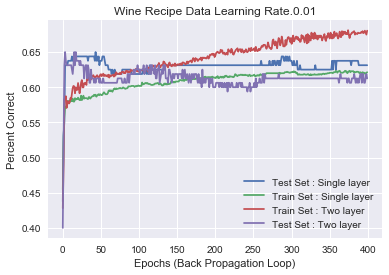

In [66]:

learningRates=[.01]
for i in learningRates:
    runNNs(X_train, X_test, y_train, y_test,num_classes,num_features,"Wine Recipe Data Learning Rate.",400,i)